In [25]:
# import
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [7]:
print(data.shape)

(743, 2)


In [18]:
x = data[:, 0];
y = data[:, 1]

print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [19]:
# CHECK  how many are NaN
sp.sum(sp.isnan(y))

8

In [20]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

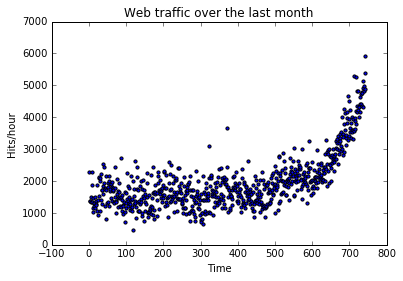

In [26]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")

plt.show()